In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
import os
import sys
sys.path.append('..')  # Add parent directory to Python path
from utils import eda_helper

In [150]:
df=pd.read_csv('/Users/sudhanvasavyasachi/Desktop/Projects/Hackathon micron/Data/train_data.csv')

In [151]:
val=pd.read_csv('/Users/sudhanvasavyasachi/Desktop/Projects/Hackathon micron/Data/val_data.csv')
test=pd.read_csv('/Users/sudhanvasavyasachi/Desktop/Projects/Hackathon micron/Data/test_data.csv')

In [152]:
df.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,duration,tolls,traffic_indicator,pickup_hour,pickup_day,is_holiday
0,1.0,1.0,1.30,1.0,Y,230,162,1.0,19,False,1,14,3,0
1,2.0,4.0,0.55,1.0,N,142,239,2.0,2,False,1,16,3,0
2,2.0,1.0,0.46,1.0,N,90,186,1.0,2,False,1,20,6,0
3,2.0,1.0,0.35,1.0,N,141,140,1.0,7,False,1,15,2,0
4,2.0,2.0,2.34,1.0,N,239,236,1.0,16,False,1,9,3,0


## Our main aim is to understand what features affect the duration of ride hence we will proceed keeping this is in mind

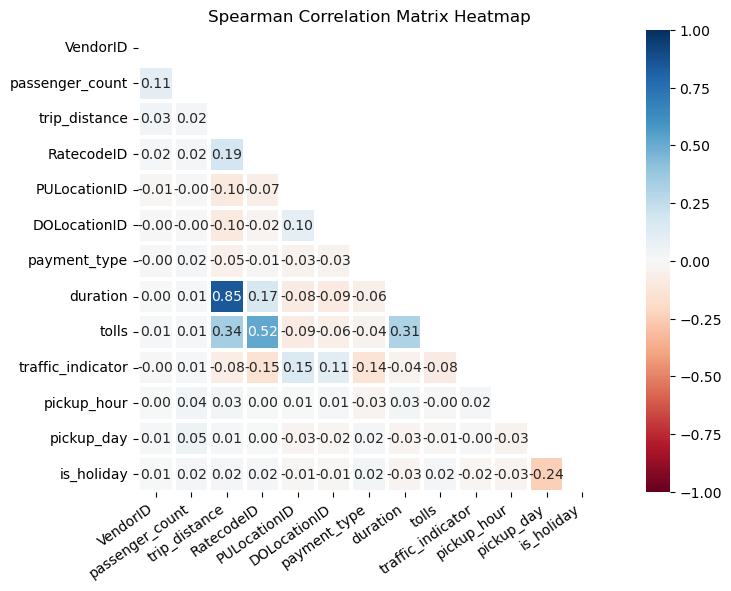

In [153]:
eda_helper.correlation_heatmap(df)

## Vendor id vs duration

In [154]:
df['VendorID']=df['VendorID'].astype('category')

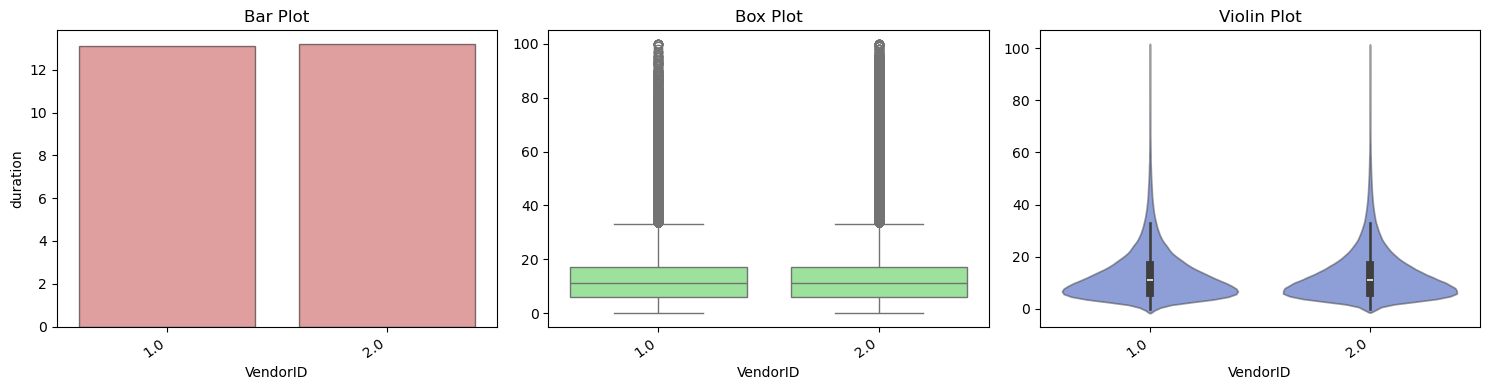

In [155]:
eda_helper.num_cat_bivar_plots(df,'duration','VendorID')

In [156]:
eda_helper.num_cat_hyp_testing(df,'duration','VendorID')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 7.7458197705652925
- p-value              : 0.0053838169592948775
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and VendorID are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 7.77624342420048
- p-value              : 0.00529377655334385
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and VendorID are associated to each other


In [157]:
df.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'duration', 'tolls', 'traffic_indicator', 'pickup_hour', 'pickup_day',
       'is_holiday'],
      dtype='object')

In [158]:
eda_helper.cramers_v(df,'VendorID','duration')

0.006783085937328541

## passenger_count vs duration

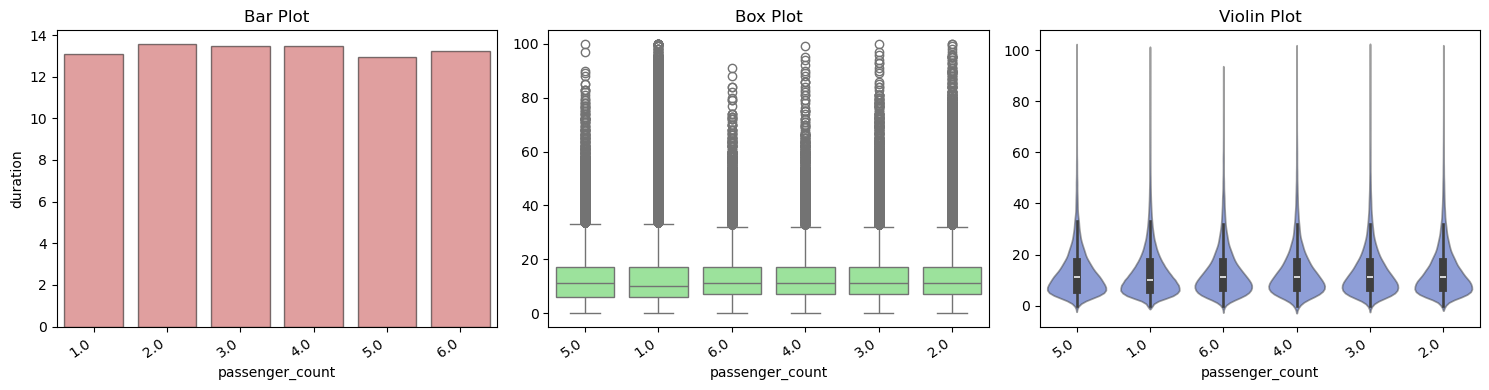

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 63.77233178753126
- p-value              : 9.052054748833125e-67
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and passenger_count are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 272.68591529962447
- p-value              : 7.41460215379557e-57
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and passenger_count are associated to each other


0.011069153714527448

In [159]:
df['passenger_count']=df['passenger_count'].astype('category')
eda_helper.num_cat_bivar_plots(df,'duration','passenger_count')
eda_helper.num_cat_hyp_testing(df,'duration','passenger_count')
eda_helper.cramers_v(df,'passenger_count','duration')

In [160]:
df['passenger_count'].value_counts()

passenger_count
1.0    641527
2.0    132069
3.0     34555
5.0     31660
6.0     18628
4.0     16752
Name: count, dtype: int64

## trip_distance vs duration (main one)

In [161]:
# we will remove negative trip distances in all df,val and test
df=df[df['trip_distance']>0]
val=val[val['trip_distance']>0]
test=test[test['trip_distance']>0]

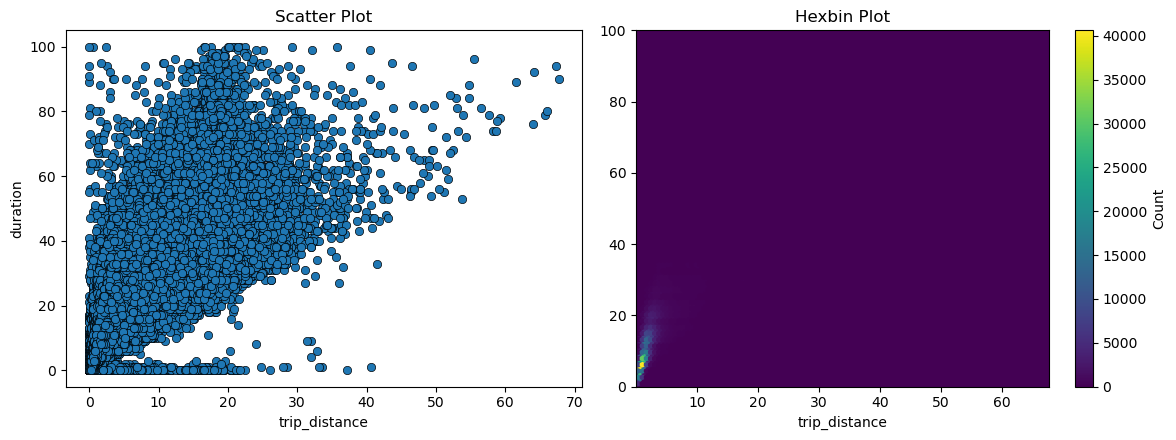

In [162]:
eda_helper.num_bivar_plots(df,'trip_distance','duration')

In [163]:
df.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type',
       'duration', 'tolls', 'traffic_indicator', 'pickup_hour', 'pickup_day',
       'is_holiday'],
      dtype='object')

## Rate code ID

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 866564 entries, 0 to 875190
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   VendorID            866564 non-null  category
 1   passenger_count     866564 non-null  category
 2   trip_distance       866564 non-null  float64 
 3   RatecodeID          866564 non-null  float64 
 4   store_and_fwd_flag  866564 non-null  object  
 5   PULocationID        866564 non-null  int64   
 6   DOLocationID        866564 non-null  int64   
 7   payment_type        866564 non-null  float64 
 8   duration            866564 non-null  int64   
 9   tolls               866564 non-null  bool    
 10  traffic_indicator   866564 non-null  int64   
 11  pickup_hour         866564 non-null  int64   
 12  pickup_day          866564 non-null  int64   
 13  is_holiday          866564 non-null  int64   
dtypes: bool(1), category(2), float64(3), int64(7), object(1)
memory usage: 81

In [165]:
df['RatecodeID'].value_counts()

RatecodeID
1.0     841744
2.0      19995
5.0       2341
3.0       1811
4.0        655
99.0        17
6.0          1
Name: count, dtype: int64

In [166]:
# i will drop rate code 99 as it is unknown ones 
df=df[df['RatecodeID']!=99]

In [167]:
df['RatecodeID'].value_counts()

RatecodeID
1.0    841744
2.0     19995
5.0      2341
3.0      1811
4.0       655
6.0         1
Name: count, dtype: int64

In [168]:
df=df[df['RatecodeID']!=6]

In [169]:
df['RatecodeID'].value_counts()

RatecodeID
1.0    841744
2.0     19995
5.0      2341
3.0      1811
4.0       655
Name: count, dtype: int64

In [170]:
df['RatecodeID']=df['RatecodeID'].astype('category')

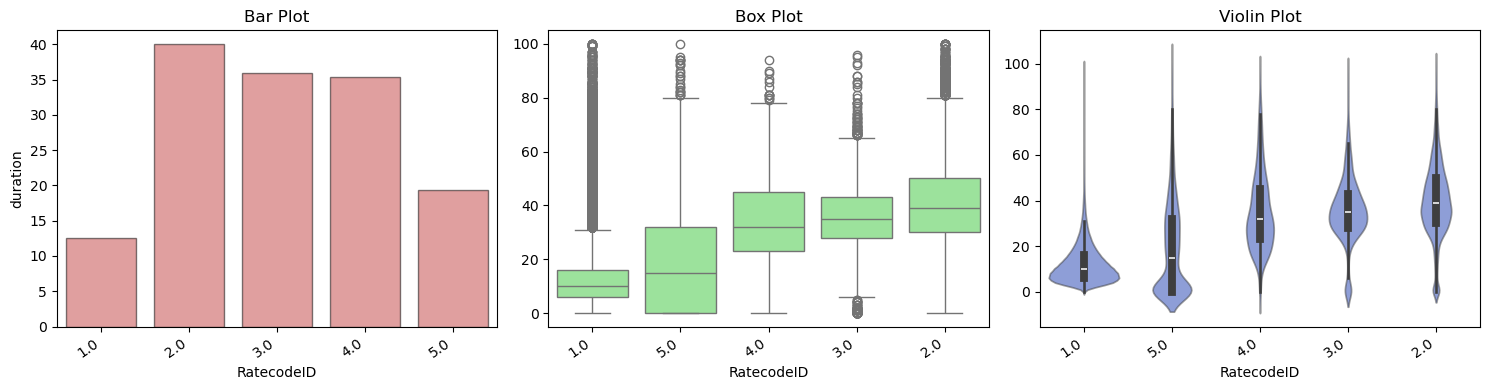

In [171]:
eda_helper.num_cat_bivar_plots(df,'duration','RatecodeID')

In [172]:
eda_helper.num_cat_hyp_testing(df,'duration','RatecodeID')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 50915.12662158482
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and RatecodeID are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 46684.75581691391
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and RatecodeID are associated to each other


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 866546 entries, 0 to 875190
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   VendorID            866546 non-null  category
 1   passenger_count     866546 non-null  category
 2   trip_distance       866546 non-null  float64 
 3   RatecodeID          866546 non-null  category
 4   store_and_fwd_flag  866546 non-null  object  
 5   PULocationID        866546 non-null  int64   
 6   DOLocationID        866546 non-null  int64   
 7   payment_type        866546 non-null  float64 
 8   duration            866546 non-null  int64   
 9   tolls               866546 non-null  bool    
 10  traffic_indicator   866546 non-null  int64   
 11  pickup_hour         866546 non-null  int64   
 12  pickup_day          866546 non-null  int64   
 13  is_holiday          866546 non-null  int64   
dtypes: bool(1), category(3), float64(2), int64(7), object(1)
memory usage: 76

In [174]:
eda_helper.cramers_v(df,'RatecodeID','duration')

0.31109068903635595

## Store and forward flag

In [175]:
df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    858154
Y      8392
Name: count, dtype: int64

In [176]:
eda_helper.cramers_v(df,'store_and_fwd_flag','duration')

0.005224718373458887

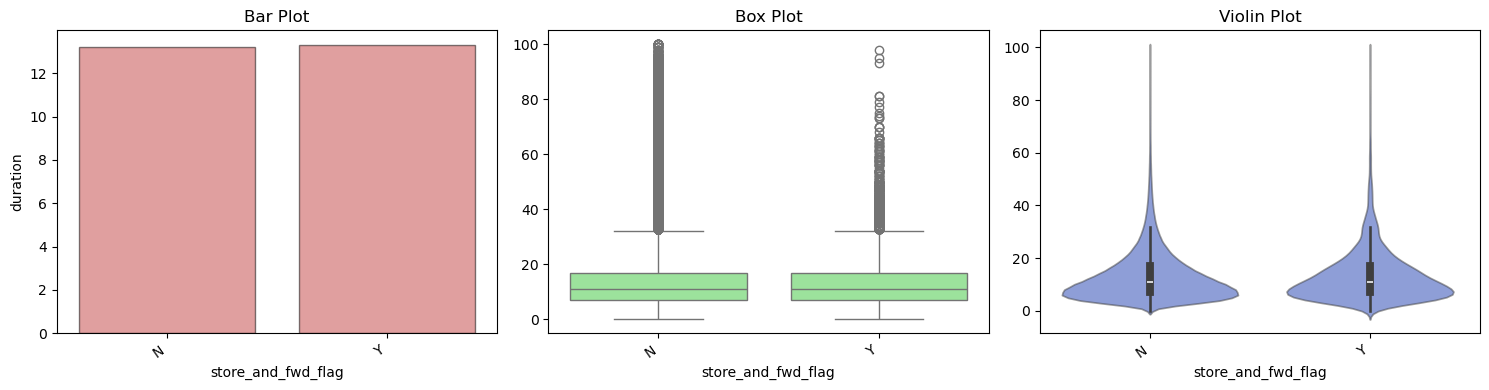

In [177]:
eda_helper.num_cat_bivar_plots(df,'duration','store_and_fwd_flag')

In [178]:
eda_helper.num_cat_hyp_testing(df,'duration','store_and_fwd_flag')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 1.1139841818469862
- p-value              : 0.2912178068022857
- Since p-value is greater than 0.05, we Fail to Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and store_and_fwd_flag are not associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 1.9733481924455611
- p-value              : 0.16009291827161318
- Since p-value is greater than 0.05, we Fail to Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and store_and_fwd_flag are not associated to each other


### it's better to remove this columns as i literally dont see any difference between the two categories

In [179]:
df.drop(['store_and_fwd_flag'],axis=1,inplace=True)

In [180]:
df.head()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,duration,tolls,traffic_indicator,pickup_hour,pickup_day,is_holiday
0,1.0,1.0,1.30,1.0,230,162,1.0,19,False,1,14,3,0
1,2.0,4.0,0.55,1.0,142,239,2.0,2,False,1,16,3,0
2,2.0,1.0,0.46,1.0,90,186,1.0,2,False,1,20,6,0
3,2.0,1.0,0.35,1.0,141,140,1.0,7,False,1,15,2,0
4,2.0,2.0,2.34,1.0,239,236,1.0,16,False,1,9,3,0


## Pick up location and drop location

- let us create a new column called route 

In [181]:
df['route'] = df['PULocationID'].astype(str) + '_' + df['DOLocationID'].astype(str)

In [182]:
df

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,duration,tolls,traffic_indicator,pickup_hour,pickup_day,is_holiday,route
0,1.0,1.0,1.30,1.0,230,162,1.0,19,False,1,14,3,0,230_162
1,2.0,4.0,0.55,1.0,142,239,2.0,2,False,1,16,3,0,142_239
2,2.0,1.0,0.46,1.0,90,186,1.0,2,False,1,20,6,0,90_186
3,2.0,1.0,0.35,1.0,141,140,1.0,7,False,1,15,2,0,141_140
4,2.0,2.0,2.34,1.0,239,236,1.0,16,False,1,9,3,0,239_236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875186,2.0,1.0,7.77,1.0,236,87,1.0,24,False,1,9,0,0,236_87
875187,2.0,1.0,4.01,1.0,113,140,1.0,23,False,1,19,2,0,113_140
875188,2.0,1.0,0.82,1.0,161,164,1.0,6,False,1,12,3,0,161_164
875189,2.0,1.0,0.27,2.0,215,262,1.0,0,True,1,21,2,0,215_262


In [183]:
df[df['PULocationID']==df['DOLocationID']]

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,duration,tolls,traffic_indicator,pickup_hour,pickup_day,is_holiday,route
19,1.0,1.0,1.90,1.0,231,231,2.0,14,False,1,4,4,0,231_231
83,2.0,6.0,0.92,1.0,264,264,1.0,5,False,1,21,3,0,264_264
131,2.0,1.0,0.63,1.0,237,237,1.0,5,False,1,16,5,0,237_237
133,2.0,2.0,1.37,1.0,164,164,2.0,20,False,1,1,5,0,164_164
146,2.0,5.0,0.49,1.0,166,166,1.0,4,False,0,21,5,0,166_166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875141,2.0,1.0,0.69,1.0,151,151,1.0,4,False,0,14,5,0,151_151
875145,2.0,4.0,0.54,1.0,158,158,2.0,2,False,1,21,5,0,158_158
875151,1.0,1.0,0.40,1.0,263,263,1.0,1,False,1,14,2,0,263_263
875159,1.0,1.0,0.50,1.0,230,230,1.0,5,False,1,16,4,0,230_230


In [184]:
df.drop(['PULocationID','DOLocationID'],axis=1,inplace=True)

In [185]:
df

,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,duration,tolls,traffic_indicator,pickup_hour,pickup_day,is_holiday,route
0,1.0,1.0,1.30,1.0,1.0,19,False,1,14,3,0,230_162
1,2.0,4.0,0.55,1.0,2.0,2,False,1,16,3,0,142_239
2,2.0,1.0,0.46,1.0,1.0,2,False,1,20,6,0,90_186
3,2.0,1.0,0.35,1.0,1.0,7,False,1,15,2,0,141_140
4,2.0,2.0,2.34,1.0,1.0,16,False,1,9,3,0,239_236
...,...,...,...,...,...,...,...,...,...,...,...,...
875186,2.0,1.0,7.77,1.0,1.0,24,False,1,9,0,0,236_87
875187,2.0,1.0,4.01,1.0,1.0,23,False,1,19,2,0,113_140
875188,2.0,1.0,0.82,1.0,1.0,6,False,1,12,3,0,161_164
875189,2.0,1.0,0.27,2.0,1.0,0,True,1,21,2,0,215_262


## Payment type

In [189]:
df['payment_type'].value_counts()

payment_type
1.0    647962
2.0    212677
3.0      3612
4.0      2295
Name: count, dtype: int64

In [192]:
df['payment_type']=df['payment_type'].astype('category')

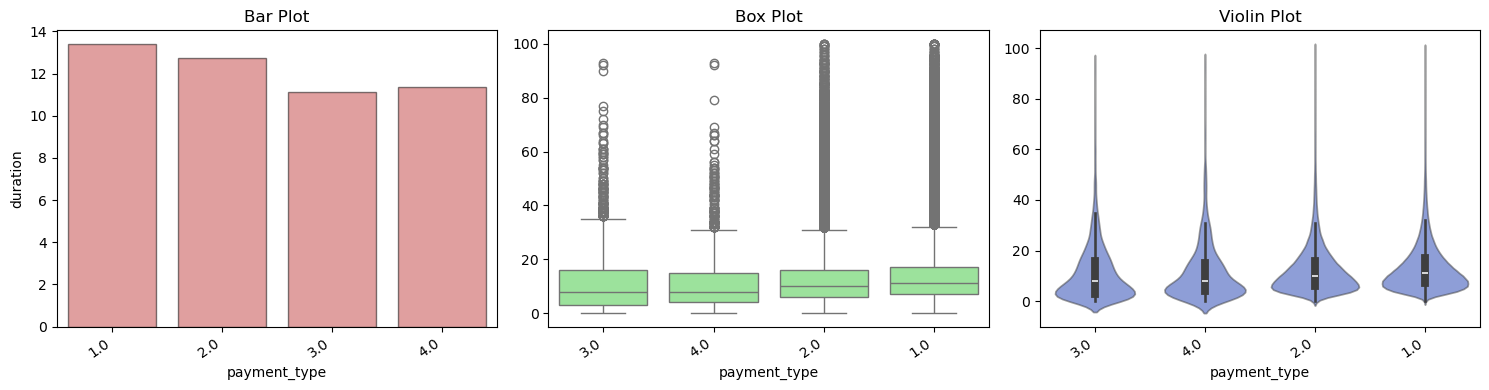

In [193]:
eda_helper.num_cat_bivar_plots(df,'duration','payment_type')

In [194]:
eda_helper.num_cat_hyp_testing(df,'duration','payment_type')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 306.86188035539
- p-value              : 3.869820125497559e-199
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and payment_type are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 2278.4937553876475
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and payment_type are associated to each other


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 866546 entries, 0 to 875190
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   VendorID           866546 non-null  category
 1   passenger_count    866546 non-null  category
 2   trip_distance      866546 non-null  float64 
 3   RatecodeID         866546 non-null  category
 4   payment_type       866546 non-null  category
 5   duration           866546 non-null  int64   
 6   tolls              866546 non-null  bool    
 7   traffic_indicator  866546 non-null  int64   
 8   pickup_hour        866546 non-null  int64   
 9   pickup_day         866546 non-null  int64   
 10  is_holiday         866546 non-null  int64   
 11  route              866546 non-null  object  
dtypes: bool(1), category(4), float64(1), int64(5), object(1)
memory usage: 57.0+ MB


## Tolls

In [196]:
df['tolls'].value_counts()

tolls
False    824278
True      42268
Name: count, dtype: int64

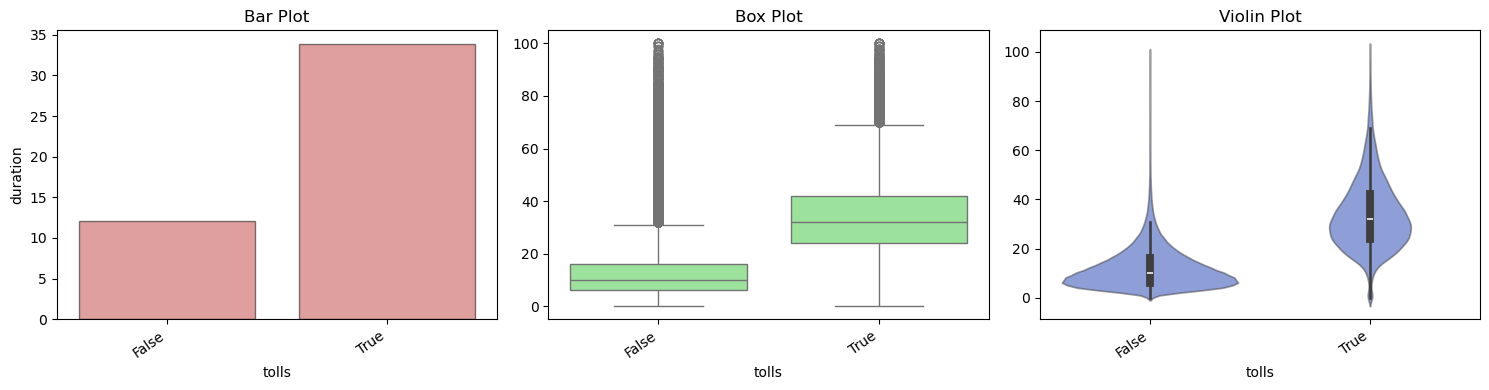

In [197]:
eda_helper.num_cat_bivar_plots(df,'duration','tolls')

In [199]:
eda_helper.num_cat_hyp_testing(df,'duration','tolls')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 250084.78791560893
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and tolls are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 87584.39910076106
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and tolls are associated to each other


## Traffic indicator

In [200]:
df['traffic_indicator'].value_counts()

traffic_indicator
1    808163
0     58383
Name: count, dtype: int64

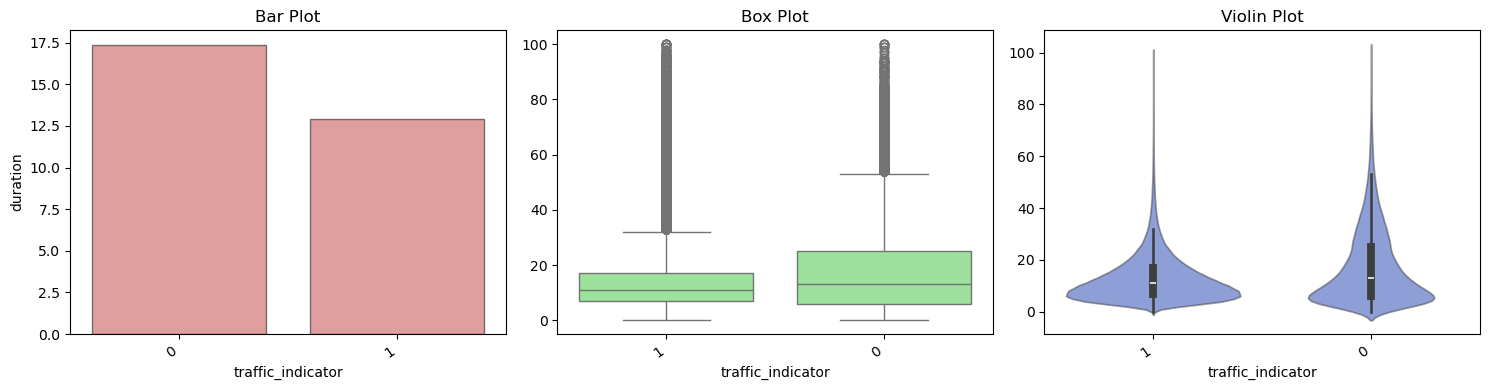

In [201]:
eda_helper.num_cat_bivar_plots(df,'duration','traffic_indicator')

In [202]:
eda_helper.num_cat_hyp_testing(df,'duration','traffic_indicator')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 11245.712870180923
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and traffic_indicator are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 2504.0473966439013
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and traffic_indicator are associated to each other


## pickup hour

In [204]:
df['pickup_hour'].value_counts()

pickup_hour
18    59415
17    54109
19    53851
15    49693
14    49598
21    47831
20    47764
16    47098
13    46747
12    46422
22    42554
11    42523
9     41813
8     41400
10    41014
7     32529
23    31960
0     23463
1     16659
6     16550
2     11782
3      8406
5      7196
4      6169
Name: count, dtype: int64

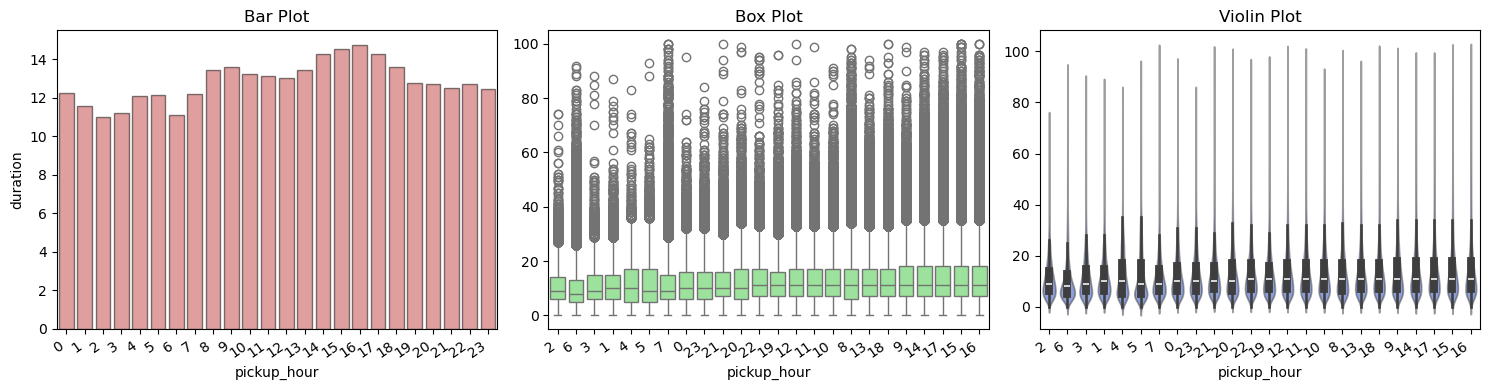

In [203]:
eda_helper.num_cat_bivar_plots(df,'duration','pickup_hour')

In [206]:
eda_helper.num_cat_hyp_testing(df,'duration','pickup_hour')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 309.3597863215594
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and pickup_hour are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 5832.831770285263
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and pickup_hour are associated to each other


## Pickup Day

In [207]:
df['pickup_day'].value_counts()

pickup_day
3    146777
4    140076
2    137744
1    119107
5    117101
0    104946
6    100795
Name: count, dtype: int64

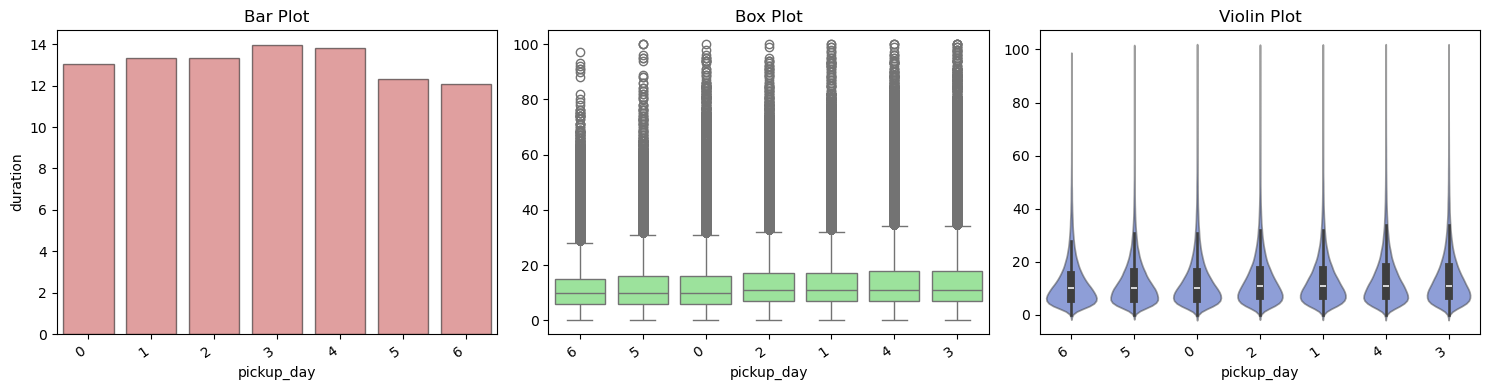

In [208]:
eda_helper.num_cat_bivar_plots(df,'duration','pickup_day')

In [209]:
eda_helper.num_cat_hyp_testing(df,'duration','pickup_day')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 628.444440416339
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and pickup_day are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 3589.747512982751
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and pickup_day are associated to each other


## Holiday

In [210]:
df['is_holiday'].value_counts()

is_holiday
0    832344
1     34202
Name: count, dtype: int64

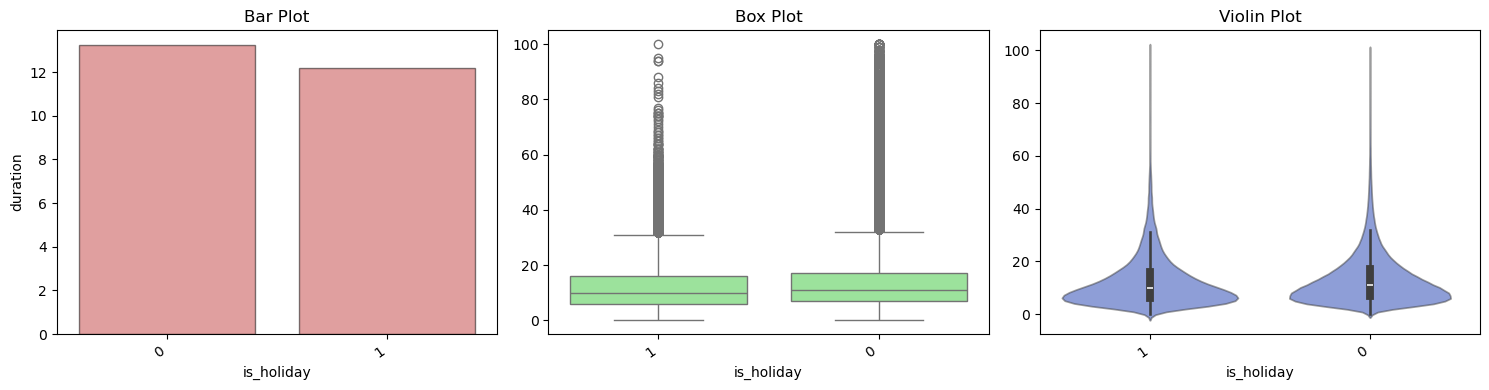

In [211]:
eda_helper.num_cat_bivar_plots(df,'duration','is_holiday')

In [212]:
eda_helper.num_cat_hyp_testing(df,'duration','is_holiday')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 393.77521190088436
- p-value              : 1.304787608980825e-87
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and is_holiday are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 631.5619161900952
- p-value              : 2.2862280736172394e-139
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and is_holiday are associated to each other


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 866546 entries, 0 to 875190
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   VendorID           866546 non-null  category
 1   passenger_count    866546 non-null  category
 2   trip_distance      866546 non-null  float64 
 3   RatecodeID         866546 non-null  category
 4   payment_type       866546 non-null  category
 5   duration           866546 non-null  int64   
 6   tolls              866546 non-null  bool    
 7   traffic_indicator  866546 non-null  int64   
 8   pickup_hour        866546 non-null  int64   
 9   pickup_day         866546 non-null  int64   
 10  is_holiday         866546 non-null  int64   
 11  route              866546 non-null  object  
dtypes: bool(1), category(4), float64(1), int64(5), object(1)
memory usage: 57.0+ MB


## Route frequency

In [214]:
route_frequencies = df['route'].value_counts()
df['route_frequency'] = df['route'].map(route_frequencies)

In [222]:
(df['route_frequency']<5).sum()

12680

In [225]:
df= df[df['route_frequency']>=10]

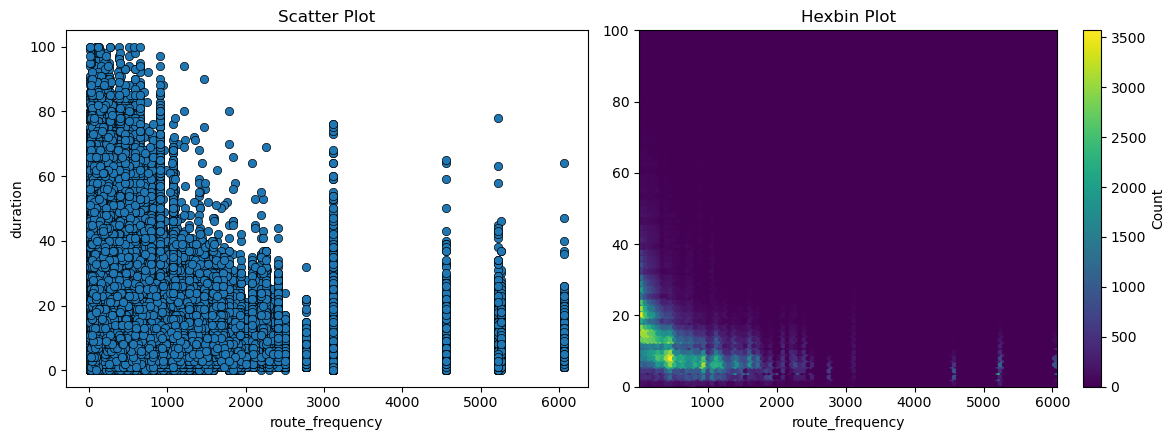

In [226]:
eda_helper.num_bivar_plots(df,'route_frequency','duration') 